In [92]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [7]:
import cv2

In [34]:
from scipy.ndimage.interpolation import rotate

In [11]:
%matplotlib inline 

In [2]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [3]:
dfAtopi = pd.read_csv("/home/ahmed/work/atopiWork/atopiCodes/preprocessing/csvs/patientNumber_imName_DegradationRate.csv")
dfNonAtopi= pd.read_csv("/home/ahmed/work/atopiWork/atopiCodes/preprocessing/csvs/nonAtopiImagesList.csv")

In [4]:
dfAtopi["label"]=1

In [5]:
dfAtopi

,Unnamed: 0,patientNumber,imagePath,degradationRate,label
0,0,357290,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,5,1
1,1,976845,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3,1
2,2,1012164,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3,1
3,3,768041,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3,1
4,4,909121,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1,1
...,...,...,...,...,...
1346,1346,529589,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,4,1
1347,1347,935352,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,2,1
1348,1348,476072,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1,1
1349,1349,212879,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,2,1


In [6]:
dfAtopi = dfAtopi[["imagePath","label"]]
dfAtopi

,imagePath,label
0,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
2,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
3,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
4,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
...,...,...
1346,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1347,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1348,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1349,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1


#### Horizontal Flip

In [24]:
image = cv2.imread(dfNonAtopi["imagePath"][0],cv2.IMREAD_UNCHANGED)
#image = cv2.cvtColor(dfNonAtopi["imagePath"][0],cv2.IMREAD_UNCHANGED)

In [25]:
image.shape

(224, 224, 3)

In [26]:
def flipImage(image):
    return image[:,::-1,:]

In [27]:
def showImage(data):
    plt.imshow(data, interpolation='nearest')
    plt.axis('off')
    plt.show()

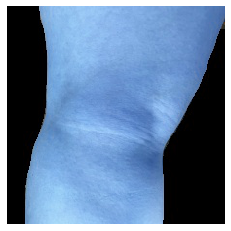

In [28]:
showImage(image)

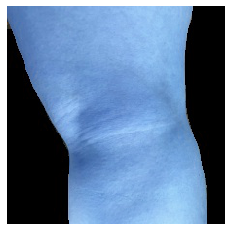

In [29]:
flippedImage = flipImage(image)
showImage(flippedImage)

In [30]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

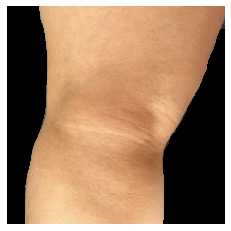

In [31]:
showImage(image)

#### Vertical flip

In [32]:
def verticalFlip(image):
    return image[::-1, :, :]

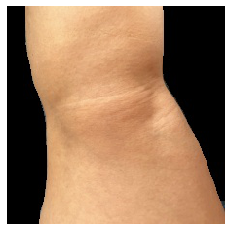

In [33]:
verticalFlippedImage = verticalFlip(image)
showImage(verticalFlippedImage)

#### Random rotation

In [38]:
def randomRotation(image, angleRange=(0,180)):
    h, w, _ = image.shape
    angle = np.random.randint(*angleRange)
    image = rotate(image, angle)
    image = cv2.resize(image, (h,w), cv2.INTER_AREA)
    return image

In [91]:
np.random.randint(180)

8

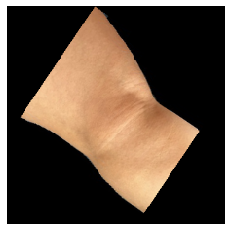

In [90]:
randomRotatedImage = randomRotation(image)
showImage(randomRotatedImage)

#### Gaussian Noise

In [46]:
def applyGaussianNoise(image):
    mu, sigma = 0, 0.1
    gaussian = np.random.normal(mu, sigma, image.shape)
    #print(gaussian.shape)
    return image +  gaussian

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


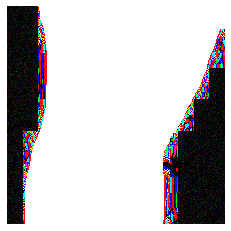

In [47]:
gaussianNoiseImage = applyGaussianNoise(image)
showImage(gaussianNoiseImage)

In [43]:
gaussian = np.random.normal(0, 0.1, image.shape)
gaussian.shape

(224, 224, 3)

In [57]:
a = np.array([0, 2, 3, 0, 4])
a +1

array([1, 3, 4, 1, 5])

In [58]:
b = np.array([1])

In [59]:
a + b

array([1, 3, 4, 1, 5])

In [60]:
a[a!=0]

array([2, 3, 4])

In [61]:
a!=0

array([False,  True,  True, False,  True])

In [62]:
np.add(a, b, where=(a!=0))

array([94168581381360,              3,              4,              8,
                    5])

In [63]:
np.where(a!=0, a, a+1)

array([1, 2, 3, 1, 4])

In [65]:
np.where(a!=0, a+2, a)

array([0, 4, 5, 0, 6])

In [86]:
def applyGaussianNoise(image):
    image = image /255
    mu, sigma = 0, 0.1
    gaussian = 0.6 * np.random.normal(mu, sigma, image.shape)
    return np.where(image==0, image, image + gaussian)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


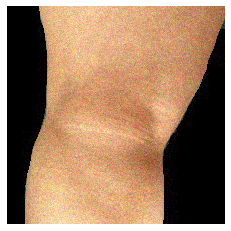

In [87]:
gaussianNoiseImage = applyGaussianNoise(image)
showImage(gaussianNoiseImage)

In [73]:
gaussianNoiseImage

array([[[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.7836, 0.4148, 0.3264],
        [0.6235, 0.4881, 0.2102],
        [0.7898, 0.3727, 0.2911]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.8239, 0.2332, 0.1855],
        [0.5944, 0.5793, 0.1716],
        [0.811 , 0.2215, 0.0847]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.9586, 0.3512, 0.3605],
        [0.6292, 0.3481, 0.2829],
        [0.5127, 0.3334, 0.3915]],

       ...,

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        .